In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("/content/delivery_time.csv")

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

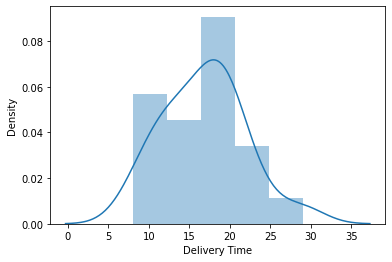

In [5]:
sns.distplot(df['Delivery Time'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

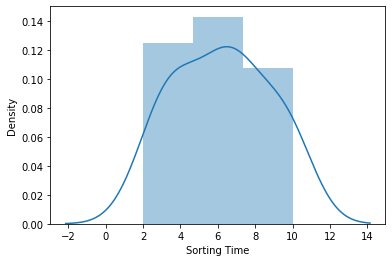

In [6]:
sns.distplot(df['Sorting Time'])

In [7]:
df = df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis = 1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

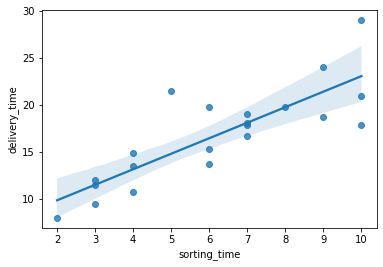

In [9]:
sns.regplot(x=df['sorting_time'],y=df['delivery_time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbea1e54040>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbea1e545e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbea1e45d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbea1e54b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbea1e54e50>],
 'means': []}

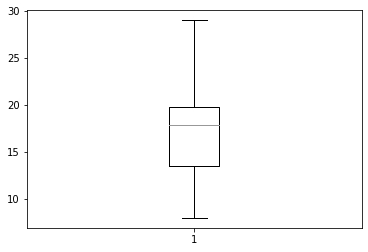

In [10]:
plt.boxplot(df.delivery_time)

(array([5., 4., 8., 3., 1.]),
 array([ 8. , 12.2, 16.4, 20.6, 24.8, 29. ]),
 <BarContainer object of 5 artists>)

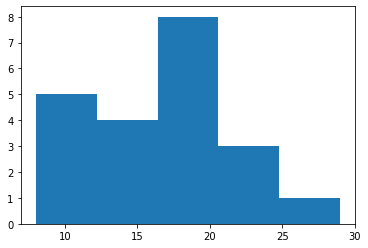

In [11]:
plt.hist(df.delivery_time,bins=5)

In [12]:
model=smf.ols("delivery_time~sorting_time",data=df).fit()

In [13]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        06:30:17   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [16]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [17]:
model1=smf.ols("delivery_time~np.log(sorting_time)",data=df).fit()

In [18]:
model1.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [19]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        06:31:05   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
sorting_time,1.108673,2.189367


In [23]:
model1.conf_int(0.05)

,0,1
Intercept,-3.97778,6.297147
np.log(sorting_time),6.16977,11.917057


In [24]:
pred = model.predict(df)

In [25]:
pred1 = model1.predict(df)

Text(0, 0.5, 'Delivery time')

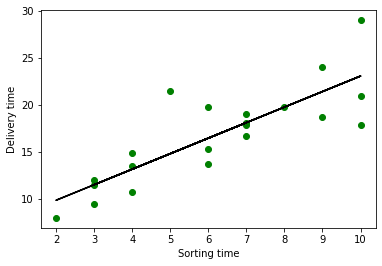

In [26]:
plt.scatter(x=df.sorting_time, y=df.delivery_time, color='green')
plt.plot(df.sorting_time, pred,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

Text(0, 0.5, 'Delivery time')

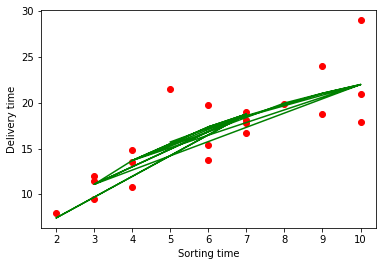

In [27]:
plt.scatter(x=df.sorting_time, y=df.delivery_time, color='red')
plt.plot(df.sorting_time, pred1,color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

In [28]:
delivery_time = (6.582734) + (1.649020)*(5)

In [29]:
delivery_time

14.827834

In [30]:
new_data=pd.Series([5,8])

In [31]:
new_data

0    5
1    8
dtype: int64

In [32]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])

In [34]:
data_pred

,sorting_time
0,5
1,8


In [35]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64